# Miller Predicting a Continuous Target with Regression

**Author:** Dan Miller

**Date:** November 12th, 2025

**Objective:** Be able to predict a continuous numeric target, fare, using features in the Titanic dataset

## Introduction

This project explores the seaborn Titanic dataset.  With the goal of being able to predict a continuous target with regression, linear regression as well as some alternative models will all be created and evaluated in terms of predicting fare, the price of the journey.  The data will be explored and prepped before the models are created.  There will be a summary at the end to discuss the findings.

## Imports

In [212]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import ElasticNet, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


## Section 1. Import and Inspect the Data

In [213]:
# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

# Inspect the first few rows of the dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Section 2. Data Exploration and Preparation

In [214]:
# Impute missing values for age using median
titanic["age"] = titanic["age"].fillna(titanic["age"].median())

# Drop rows with missing fare
titanic = titanic.dropna(subset=["fare"])

# Create a new feature for family size
titanic["family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Fill missing values in the embarked column with the most common value
titanic["embarked"] = titanic["embarked"].fillna(titanic["embarked"].mode()[0])

# Map categorical variable embarked to numerical values
titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})

## Section 3. Feature Selection & Justification

There will be four different cases of input features in this notebook, they are:

**Case 1**
- input feature: age
- target: fare

**Case 2**
- input feature: family_size
- target: fare

**Case 3**
- input features: age, family_size
- target: fare

**Case 4**
- input features: pclass, embarked
- target: fare

In [215]:
# Case 1 - age

X1 = titanic[["age"]]
y1 = titanic["fare"]

# Case 2 - family_size

X2 = titanic[["family_size"]]
y2 = titanic["fare"]

# Case 3 - age & family_size

X3 = titanic[["age", "family_size"]]
y3 = titanic["fare"]

# Case 4 - pclass & embarked
X4 = titanic[["pclass", "embarked"]]
y4 = titanic["fare"]

### Reflection 3:

1) Why might these features affect a passenger's fare? **It's not unheard of for there to be discounts for kids and seniors, perhaps there was something similar here.  It may have been more expensive to board larger families due to more space needed as well as more food.**

2) List all available features:
   - survived
   - pclass
   - sex
   - age
   - sibsp
   - parch
   - embarked
   - class
   - who
   - adult_male
   - deck
   - embark_town
   - alive
   - alone

3) Which other features could improve predictions and why? **Sex, embarked, embark_town, and class/pclass.  There may have been different prices for men and women.  Similarly, different towns may have had higher/lower prices.  It generally seems that the higher class you're in, the fancier room you get, meaning the more expensive your journey.**

4) How many variables are in your Case 4: **2**

5) Which variables did you choose for Case 4 and why do you feel those could make good inputs?  **I went with pclass and embarked.  Pclass gives the class that the individual was in, and again the higher the class the more they pay.  For embarked, I feel that different cities may have had different fares as the cities were not all in the same country.**

## Section 4. Train a Regression Model (Linear Regression)

### 4.1 Split the Data

In [216]:
# Create training and testing sets for each case

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

### 4.2 Train and Evaluate Linear Regression Models

In [217]:
# Create Linear Regression models and train them

lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Make predictions on the test sets

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

### 4.3 Report Performance

In [218]:
# Case 1 - age
print("Case 1: Training R2:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R2:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print("\n")
# Case 2 - family_size
print("Case 2: Training R2:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R2:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))
print("\n")
# Case 3 - age & family_size
print("Case 3: Training R2:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R2:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))
print("\n")
# Case 4 - pclass & embarked
print("Case 4: Training R2:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R2:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y4_test, y_pred_test4))

Case 1: Training R2: 0.009950688019452314
Case 1: Test R2: 0.0034163395508415295
Case 1: Test RMSE: 1441.8455811188421
Case 1: Test MAE: 25.28637293162364


Case 2: Training R2: 0.049915792364760736
Case 2: Test R2: 0.022231186110131973
Case 2: Test RMSE: 1414.6244812277246
Case 2: Test MAE: 25.02534815941641


Case 3: Training R2: 0.07347466201590014
Case 3: Test R2: 0.049784832763073106
Case 3: Test RMSE: 1374.7601875944658
Case 3: Test MAE: 24.284935030470688


Case 4: Training R2: 0.3182447277079269
Case 4: Test R2: 0.3295273925136103
Case 4: Test RMSE: 970.0319247957374
Case 4: Test MAE: 21.315443001585543


### Reflection 4:

**Compare the train vs test results**

1) Did Case 1 overfit or underfit? Explain: **Underfit.  The R2 value is incredibly low in both training and testing, it explains practically none of the variance.**

2) Did Case 2 overfit or underfit? Explain: **Underfit.  Similar to Case 1, the R2 values in both datasets are too low.**

3) Did Case 3 overfit or underfit? Explain: **Underfit.  While better than the previous cases, again the R2 values are too low.**

4) Did Case 4 overfit or underfit? Explain: **Neither.  Both R2 values are almost identical and relatively high.  I'd say it's a good model, no overfitting and no underfitting.**

**Adding Age**

1) Did adding age improve the model? **Yes, Case 3 performed slightly better than Case 2.**

2) Propose a possible explanation:  **Family size may relate to fare because larger families probably traveled in cheaper classes.  Age might add that older adults could afford higher classes, so for instance grandparents may have stayed in a higher class than the rest or something along those lines.  So there was a slight increase in performance.**

**Worst**

1) Which case performed the worst: **Case 1**

2) How do you know? **It had the lowest R2 score and the highest RMSE and MAE scores.**

3) Do you think adding more training data would improve it?  **No, I believe that the feature age doesn't explain basically any of the variation in fare.**

**Best**

1) Which case performed the best: **Case 4**

2) How do you know? **It had the highest R2 score and the lowest RMSE and MAE scores.**

3) Do you think adding more training data would improve it? **No, the model only uses two predictors that explain roughly a third of fare's variation.  I believe the rest of the variation lies in other predictors.**

## Section 5. Compare Alternative Models

The best performing case was Case 4, so Case 4 is what we will be using while exploring alternative models.

### 5.1 Ridge Regression (L2 penalty)

- Penalty term: L2 = sum of squared weights
- Effect: Shrinks weights, helps reduce overfitting, keeps all features

In [219]:
# Create ridge model, train it, and make predictions

ridge_model = Ridge(alpha=1.0).fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

### 5.2 Elastic Net (L1 + L2 combined)

- If l1_ratio = 0, it behaves like Ridge
- If l1_ratio = 1, it behaves like Lasso
- Values in between mix both types
- Penalty term: alpha x (L1 + L2)
- Effect: Shrinks weights and can drop some features - flexible and powerful

In [220]:
# Create elastic net model, train it, and make predictions

elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5).fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

### 5.3 Polynomial Regression

Polynomial regression adds interaction and nonlinear terms to the model.

In [221]:
# Set up the poly inputs

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model

poly_model = LinearRegression().fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)

### 5.4 Visualize Polynomial Cubic Fit (for 1 input feature)

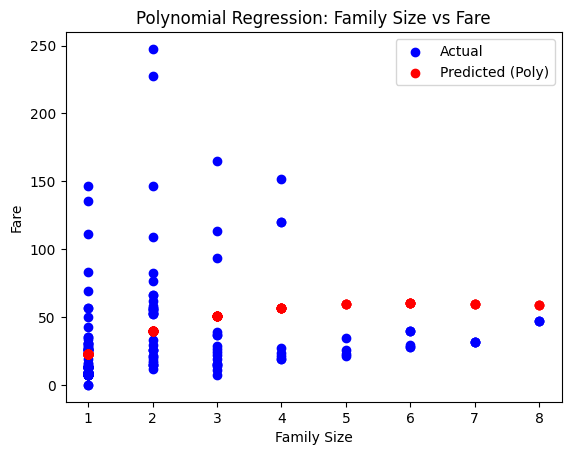

In [222]:
# Plot the polynomial fit for a case with one input feature (Case 2 - family_size)
poly2 = PolynomialFeatures(degree=3)
X2_train_poly = poly2.fit_transform(X2_train)
X2_test_poly = poly2.transform(X2_test)
poly2_model = LinearRegression().fit(X2_train_poly, y2_train)
y_pred_poly2 = poly2_model.predict(X2_test_poly)

plt.scatter(X2_test, y2_test, color="blue", label="Actual")
plt.scatter(X2_test, y_pred_poly2, color="red", label="Predicted (Poly)")
plt.legend()
plt.title("Polynomial Regression: Family Size vs Fare")
plt.xlabel("Family Size")
plt.ylabel("Fare")
plt.show()


### 5.4 Reflection:

1) What patterns does the cubic model seem to capture?  **There is an increasing trend, higher fares for larger families.**

2) Where does it perform well or poorly?  **It performs the best for lower family sizes (1-4), and seems to predict higher for higher family sizes.**

3) Did the polynomial fit outperform linear regression?  **The polynomial fit does outperform linear regression.**

4) Where does it fit best?  **Lower family sizes is where it fits the best.**

### 5.5 Compare All Models

In [223]:
# Create function to print metrics
def report(name, y_true, y_pred):  # noqa: D103
    print(f"{name}:")
    print("R2:", r2_score(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("\n")

# Call report function for each model
report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear:
R2: 0.3295273925136103
RMSE: 970.0319247957374
MAE: 21.315443001585543


Ridge:
R2: 0.33013977889602564
RMSE: 969.1459313418362
MAE: 21.285901231060585


ElasticNet:
R2: 0.3657364688023218
RMSE: 917.6450568234654
MAE: 19.82747361535895


Polynomial:
R2: 0.38583844122610345
RMSE: 888.5617582894122
MAE: 18.566016175116612




### 5.6 Visualize Higher Order Polynomial (for the same 1 input case)

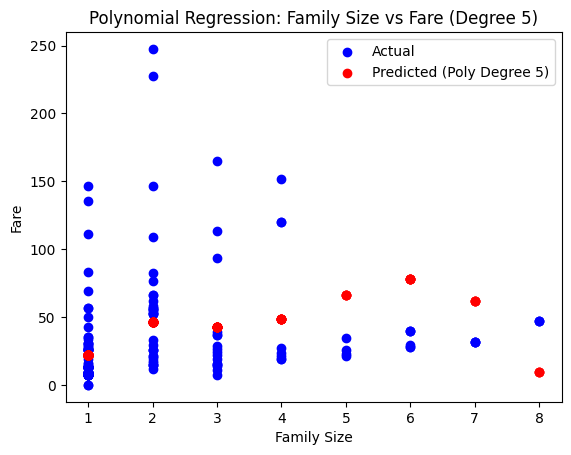

In [224]:
# Plot the polynomial fit for Case 2 but with a higher degree
poly3 = PolynomialFeatures(degree=5)
X2_train_poly3 = poly3.fit_transform(X2_train)
X2_test_poly3 = poly3.transform(X2_test)
poly3_model = LinearRegression().fit(X2_train_poly3, y2_train)
y_pred_poly3 = poly3_model.predict(X2_test_poly3)

plt.scatter(X2_test, y2_test, color="blue", label="Actual")
plt.scatter(X2_test, y_pred_poly3, color="red", label="Predicted (Poly Degree 5)")
plt.legend()
plt.title("Polynomial Regression: Family Size vs Fare (Degree 5)")
plt.xlabel("Family Size")
plt.ylabel("Fare")
plt.show()


**Analysis:**
I believe that the initial cubic polynomial degree performed better than the higher degree.  While the higher degree learns to bring the fare price down for families of size 8, it brought the price down too much to the point where there's now more error in families of size 8.  The model also increased price for families of size 5-7 which in turn increased error as well.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize Findings

**Table 1 - Linear Regression**

|  Case                      |  R2   |  RMSE  |  MAE  |
| :------------------------: | ----: | -----: | ----: |
| Case 1 - Age               | 0.003 | 1441   | 25.29 |
| Case 2 - Family Size       | 0.022 | 1414   | 25.03 |
| Case 3 - Age & Family Size | 0.050 | 1374   | 24.28 |
| Case 4 - Pclass & Embarked | 0.330 | 970.0  | 21.32 |

**Table 2 - Case 4 Alternate Models**

|   Model    |  R2   |  RMSE  |  MAE  |
| :--------: | ----: | -----: | ----: |
| Linear     | 0.330 | 970.0  | 21.32 |
| Ridge      | 0.330 | 969.1  | 21.29 |
| ElasticNet | 0.366 | 917.6  | 19.83 |
| Polynomial | 0.386 | 888.6  | 18.57 |

1) What features were most useful?  **Case 4 performed the best, and it used the features pclass & embarked.**

2) What regression model performed best?  **Of all the models, the Polynomial model performed the best.**

3) How did model complexity or regularization affect results?  **Increasing model complexity created models that were more accurate; however, making the models too complex (adding too many degrees to the polynomial) hurt the results.  Regularization had a similar affect.  The ridge and elastic net models performed better than normal linear regression.**

### 6.2 Discuss Challenges

1) Was fare hard to predict? Why?  **Yes, fare was hard to predict.  This is most likely because the models were too simple.  The linear models almost all seemed to underfit, aside from Case 4.  This also brings up the fact that fare may depend on combinations of features in a nonlinear way that weren't present in this notebook.**

2) Did skew or outliers impact the models?  **There are a few outliers that negatively impacted model performance.  In linear regression, coefficients get pulled toward outliers, making predictions worse.  We can see in the polynomial plots of Family Size vs Fare that fare is right-skewed, which ended up causing the model to overestimate prices for large families.**